In [1]:
# Test migration history reconstruction on simulated data

import sys
import os

REPO_DIR = os.path.join(os.getcwd(), "../../")
os.chdir(REPO_DIR)
from src.lib.metient import *
import src.lib.vertex_labeling as vert
import src.util.vertex_labeling_util as vutil

import matplotlib
import torch
MACHINA_DATA_DIR = os.path.join(REPO_DIR, 'src/data/machina_sims')
OUT_DIR = os.path.join(REPO_DIR, "src/test/output_plots")

CUDA GPU: False


In [2]:
import pydot
from IPython.display import Image, display

def visualize_ground_truth(tree_fn, graph_fn):
    def view_pydot(pdot):
        plt = Image(pdot.create_png())
        display(plt)
    
    (graph,) = pydot.graph_from_dot_file(tree_fn)
    view_pydot(graph)

    (graph,) = pydot.graph_from_dot_file(graph_fn)
    view_pydot(graph)
        

Ground truth


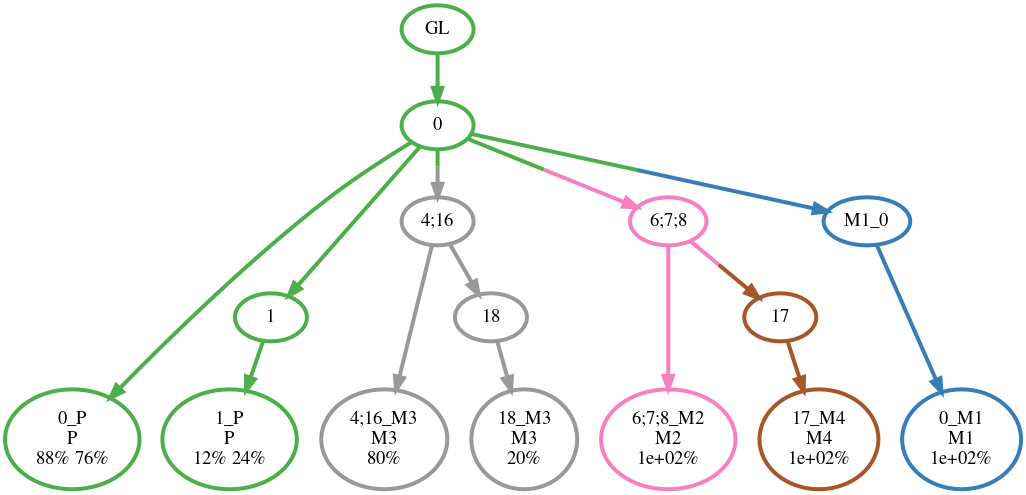

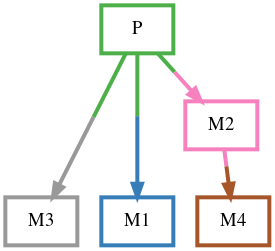

In [13]:
num_sites = "m5"
mig_type = "mS"
seed = 9
# num_sites = "m5"
# mig_type = "M"
# seed = 694
# num_sites = "m5"
# mig_type = "S"
# seed = 31
SIM_DATA_DIR = os.path.join(MACHINA_DATA_DIR, num_sites, mig_type)

print("Ground truth")
visualize_ground_truth(os.path.join(SIM_DATA_DIR, f"T_seed{seed}.dot"), os.path.join(SIM_DATA_DIR, f"G_seed{seed}.dot"))



In [4]:
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'cornflowerblue', 'hotpink', 'grey', 'saddlebrown', 'darkorange', 'purple', 'red', 'black', 'black', 'black', 'black']]
def find_labelings_all_mutation_trees(cluster_fn, all_mut_trees_fn, ref_var_fn):
    idx_to_cluster_label = get_idx_to_cluster_label(cluster_fn, ignore_polytomies=True)
    data = get_adj_matrices_from_spruce_mutation_trees(all_mut_trees_fn, idx_to_cluster_label, is_sim_data=True)
    print_config = PrintConfig(visualize=True, verbose=False, viz_intermeds=False, k_best_trees=10, save_outputs=True)
    print("# trees:", len(data))
    
    

    MODE = "calibrate"
    if MODE =='evaluate':
        weights = Weights(mig=[10], mig_delta=0.8, seed_site=[1], gen_dist=0.1)
    else:
        weights = Weights(mig=[3,1,1], mig_delta=0.8, seed_site=[1,1,3], gen_dist=1.0)

    for tree_num, (adj_matrix, pruned_idx_to_label) in enumerate(data):
        print(f"Tree {tree_num}")
        T = torch.tensor(adj_matrix, dtype = torch.float32)
        ref_matrix, var_matrix, unique_sites= get_ref_var_matrices_from_machina_sim_data(ref_var_fn, pruned_idx_to_label, T)
        G = get_genetic_distance_matrix_from_adj_matrix(T, pruned_idx_to_label, ";", normalize=True)
        print("G", G)
        T_edges, labeling, G_edges, loss_info, time = get_migration_history(T, ref_matrix, var_matrix, unique_sites, 'P', pruned_idx_to_label,
                                                                            weights, print_config, OUT_DIR, f"tree{tree_num}_{MODE}", 
                                                                            G=G, max_iter=80, batch_size=1024, custom_colors=custom_colors, 
                                                                            weight_init_primary=True, mode=MODE, solve_polytomies=True)


        

# trees: 30
Tree 0
G tensor([[0.0000, 0.0500, 0.0000, 0.0000, 0.2750, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.1500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0250, 0.0000, 0.0000, 0.0750, 0.0750, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1250,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0250, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0500, 0.0000, 0.0000, 0.0500],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0500, 0.0000, 0.00

/lila/data/morrisq/divyak/projects/met_history_prediction/src/util/vertex_labeling_util.py:259: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A.T, remove_self_loops=False), dtype = torch.float32)


nodes_w_polys [2, 4, 5] resolver_sites [[1], [4], [4]]
num_new_nodes 3
children_of_polys [3, 6, 7, 5, 17, 20, 22, 26, 9, 12, 27]
resolver_indices [13, 14, 15]
nodes_w_polys_to_resolver_indices OrderedDict([(2, [13]), (4, [14]), (5, [15])])
resolver_labeling tensor([[0., 0., 0.],
        [1., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 1., 1.]])
parent_idx 2 mask_indices [13, 2]
parent_idx 4 mask_indices [14, 4]
parent_idx 5 mask_indices [15, 5]
resolver_index_to_parent_idx {13: 2, 14: 4, 15: 5}
T torch.Size([30, 30])
num_nodes_to_label 12
X torch.Size([1024, 5, 12])
nodes_w_children [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] sites [[0, 1, 2, 4], [0], [1, 3], [1, 2], [0, 1, 2, 4], [0, 4], [1], [3], [2], [0], [3], [4], [4]]
p tensor([[1],
        [0],
        [0],
        [0],
        [0]]) prim_site_idx tensor(0)
X tensor([[4.0000, 2.0000, 2.0000, 4.0000, 4.0000, 2.0000, 2.0000, 2.0000, 4.0000,
         2.0000, 2.0000, 2.0000],
        [0.9746, 4.0000, 4.0000, 4.00

  0%|          | 0/80 [00:00<?, ?it/s]/lila/data/morrisq/divyak/projects/met_history_prediction/src/util/vertex_labeling_util.py:250: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A, remove_self_loops=True), dtype = torch.float32)
100%|██████████| 80/80 [00:06<00:00, 13.08it/s]


num solutions 1024
best_sum 14
best_pars_metrics {(7, 5, 2)}
bs 1024
pruned solutions 22


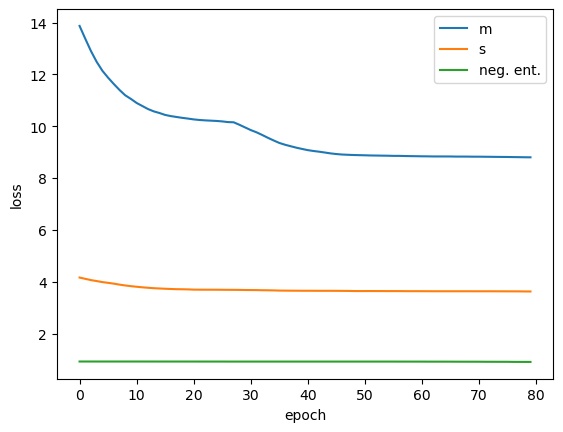

10 unique trees were not found (4 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

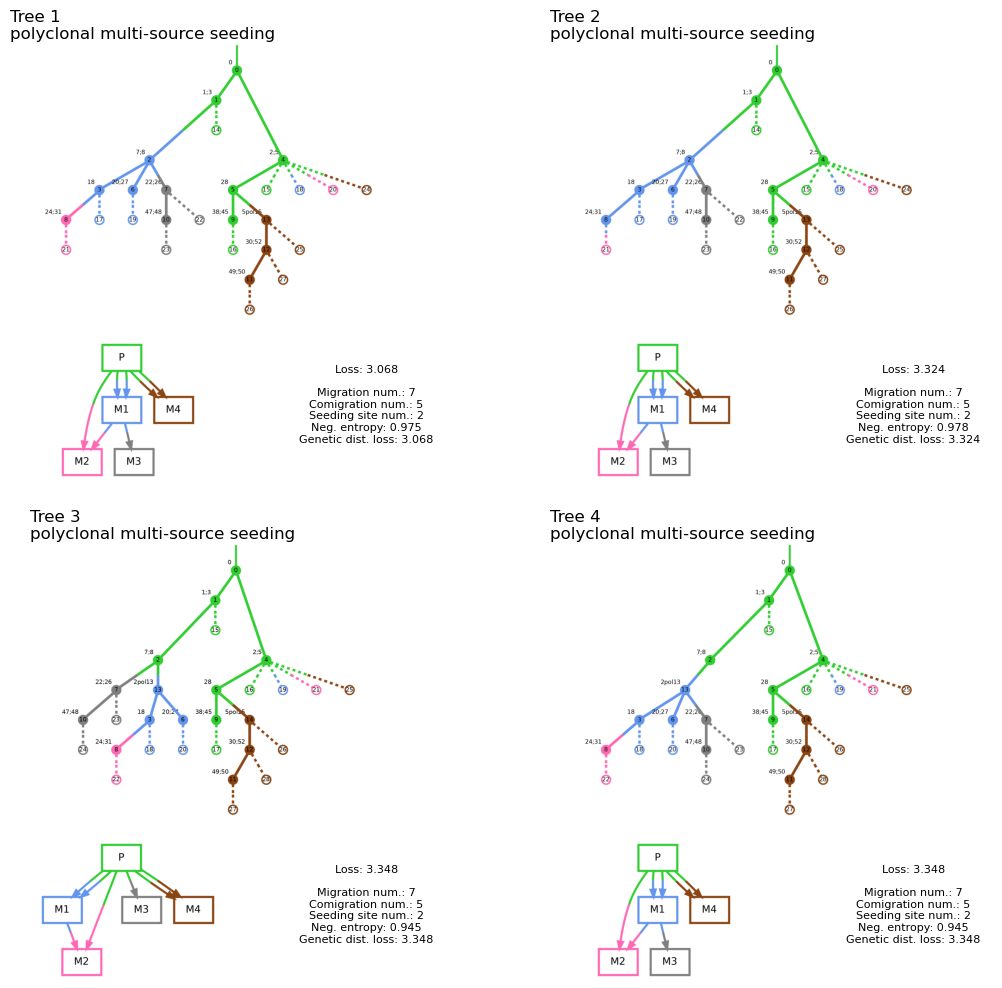

Tree 1
G tensor([[0.0000, 0.0500, 0.0000, 0.0000, 0.2750, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.1500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0250, 0.0000, 0.0000, 0.0750, 0.0750, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1250,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0250, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0500, 0.0000, 0.0500, 0.0500],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0500, 0.0000, 0.0000],
       

/lila/data/morrisq/divyak/projects/met_history_prediction/src/util/vertex_labeling_util.py:259: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A.T, remove_self_loops=False), dtype = torch.float32)


nodes_w_polys [2, 5] resolver_sites [[1], [4]]
num_new_nodes 2
children_of_polys [3, 6, 7, 9, 11, 12, 25]
resolver_indices [13, 14]
nodes_w_polys_to_resolver_indices OrderedDict([(2, [13]), (5, [14])])
resolver_labeling tensor([[0., 0.],
        [1., 0.],
        [0., 0.],
        [0., 0.],
        [0., 1.]])
parent_idx 2 mask_indices [13, 2]
parent_idx 5 mask_indices [14, 5]
resolver_index_to_parent_idx {13: 2, 14: 5}
T torch.Size([28, 28])
num_nodes_to_label 12
X torch.Size([1024, 5, 12])
nodes_w_children [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] sites [[0, 1, 2], [0], [1, 3], [1, 2], [0, 1, 2, 4], [0, 4], [1], [3], [2], [0], [3], [4], [4]]
p tensor([[1],
        [0],
        [0],
        [0],
        [0]]) prim_site_idx tensor(0)
X tensor([[4.0000e+00, 2.0000e+00, 2.0000e+00, 4.0000e+00, 4.0000e+00, 2.0000e+00,
         2.0000e+00, 2.0000e+00, 4.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00],
        [9.7099e-01, 4.0000e+00, 4.0000e+00, 4.0000e+00, 9.9691e-01, 4.0000e+00,
         4

  0%|          | 0/80 [00:00<?, ?it/s]/lila/data/morrisq/divyak/projects/met_history_prediction/src/util/vertex_labeling_util.py:250: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A, remove_self_loops=True), dtype = torch.float32)
100%|██████████| 80/80 [00:05<00:00, 15.46it/s]


num solutions 1024
best_sum 13
best_pars_metrics {(6, 5, 2)}
bs 1024
pruned solutions 33


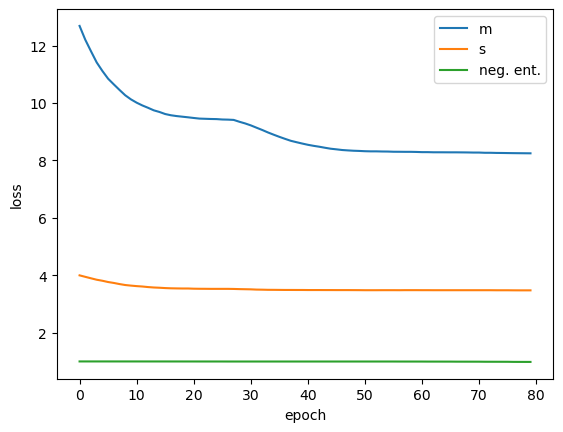

10 unique trees were not found (4 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

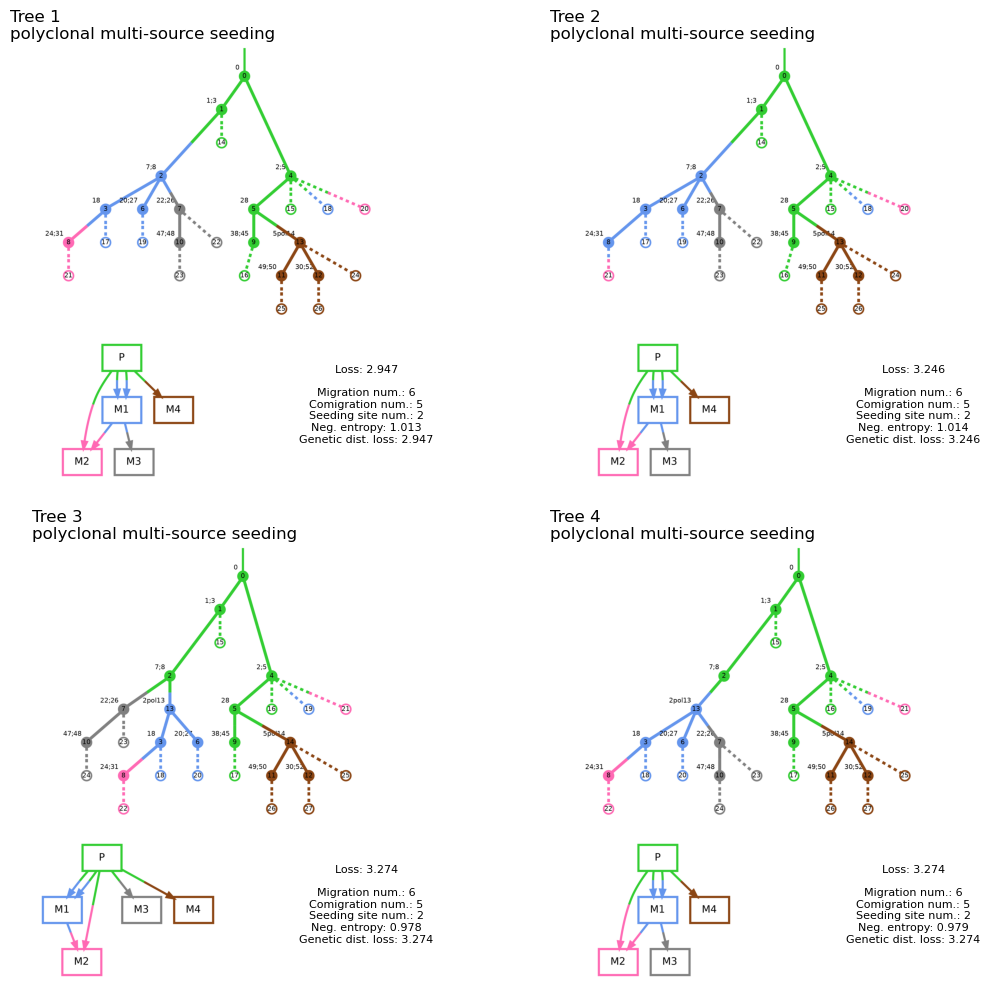

Tree 2
G tensor([[0.0000, 0.0500, 0.0000, 0.0000, 0.2750, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.1500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0250, 0.0000, 0.0000, 0.0750, 0.0750, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1250,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0250, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0500, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0500, 0.0000, 0.0000, 0.0500],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0500, 0.0000, 0.0000],
       

100%|██████████| 80/80 [00:06<00:00, 12.77it/s]


num solutions 1024
best_sum 14
best_pars_metrics {(7, 5, 2)}
bs 1024
pruned solutions 21


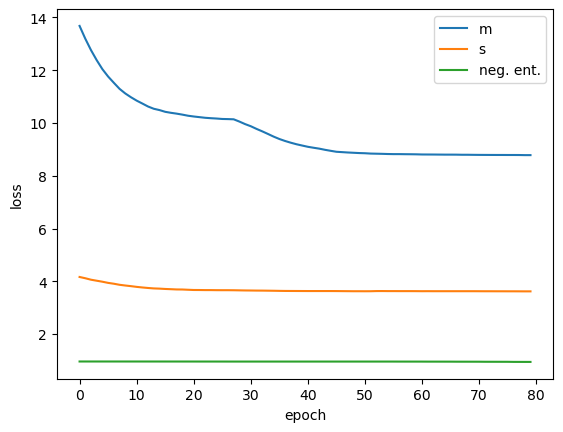

10 unique trees were not found (4 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

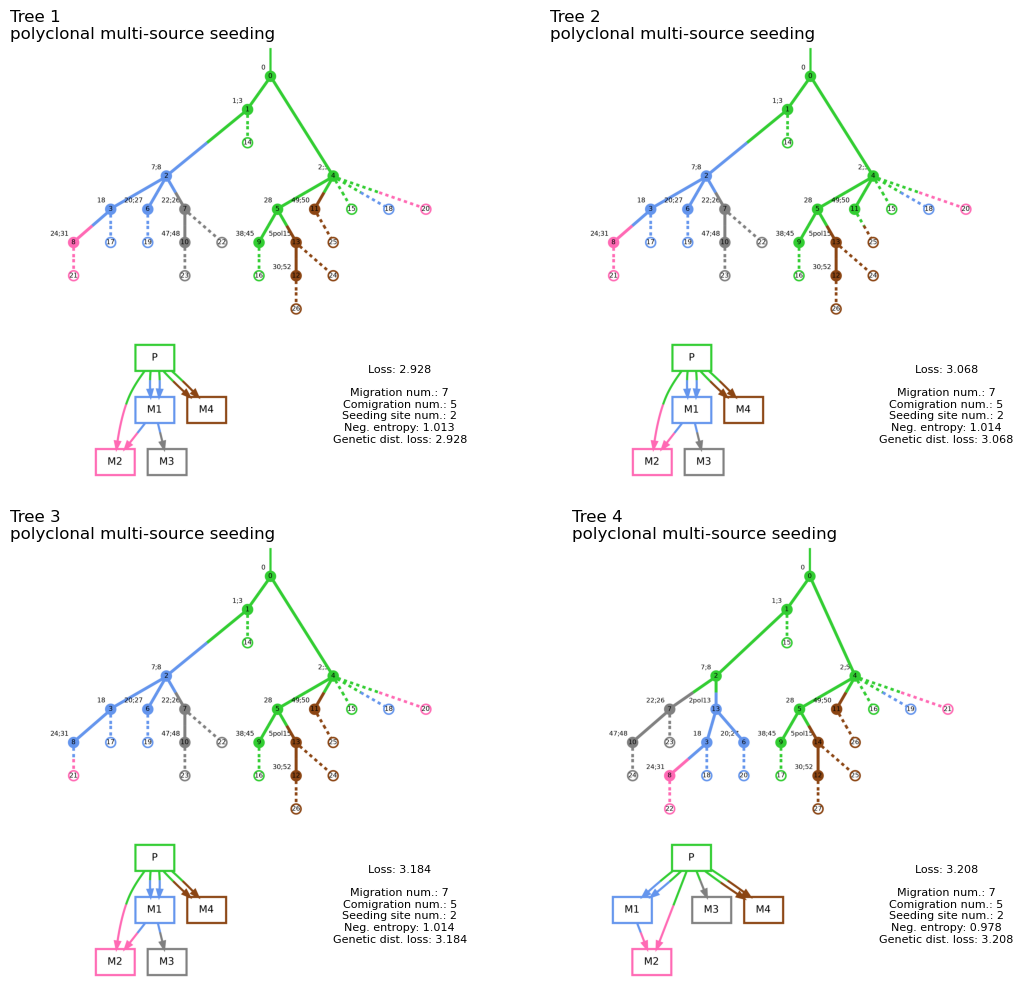

Tree 3
G tensor([[0.0000, 0.0500, 0.0000, 0.0000, 0.2750, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.1500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0250, 0.0000, 0.0000, 0.0000, 0.0750, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1250,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0250, 0.0750, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0500, 0.0000, 0.0500, 0.0500],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0500, 0.0000, 0.0000],
       

100%|██████████| 80/80 [00:05<00:00, 14.65it/s]


num solutions 1024
best_sum 13
best_pars_metrics {(6, 5, 2)}
bs 1024
pruned solutions 30


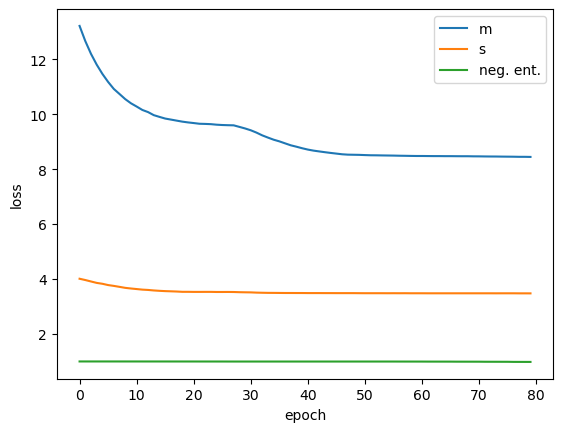

10 unique trees were not found (4 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

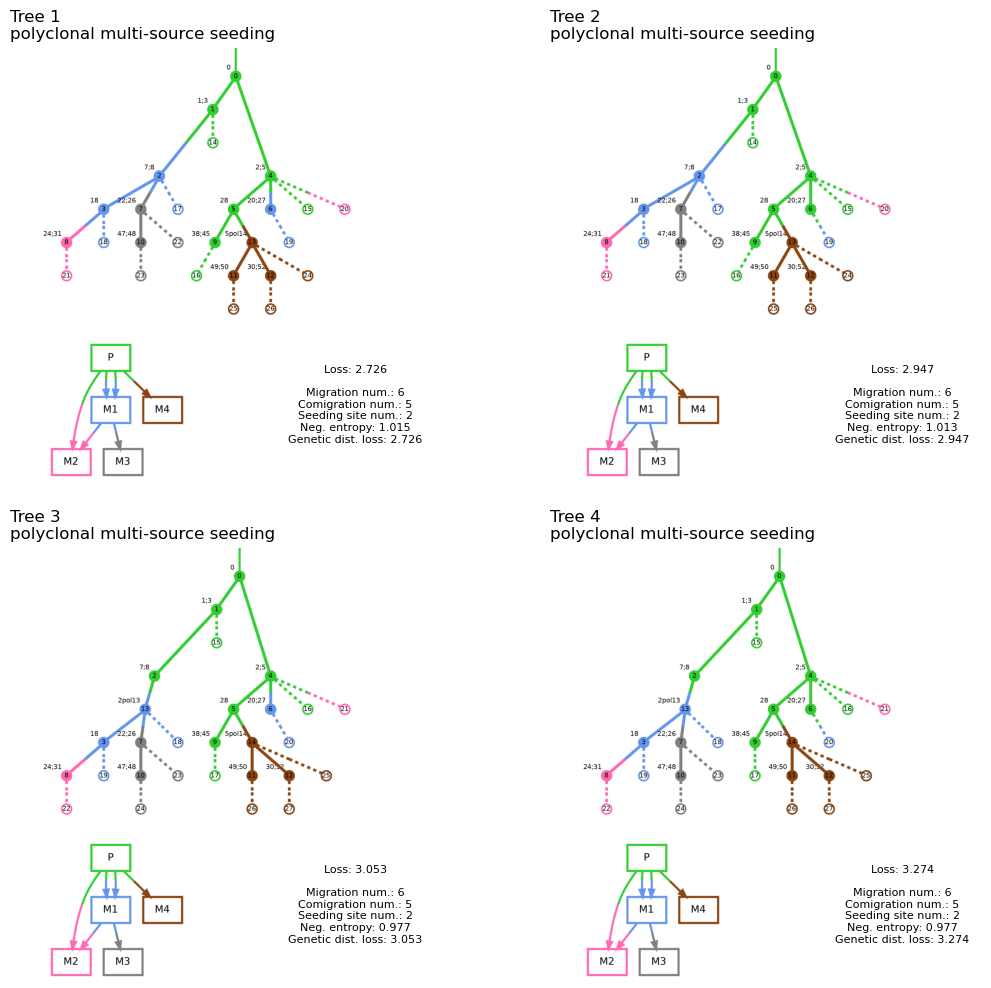

Tree 4
G tensor([[0.0000, 0.0500, 0.0000, 0.0000, 0.2750, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.1500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0250, 0.0000, 0.0000, 0.0000, 0.0750, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1250,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0250, 0.0750, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0500, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0500, 0.0000, 0.0000, 0.0500],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0500, 0.0000, 0.0000],
       

100%|██████████| 80/80 [00:06<00:00, 13.15it/s]


num solutions 1024
best_sum 13
best_pars_metrics {(8, 4, 1)}
bs 1024
pruned solutions 1


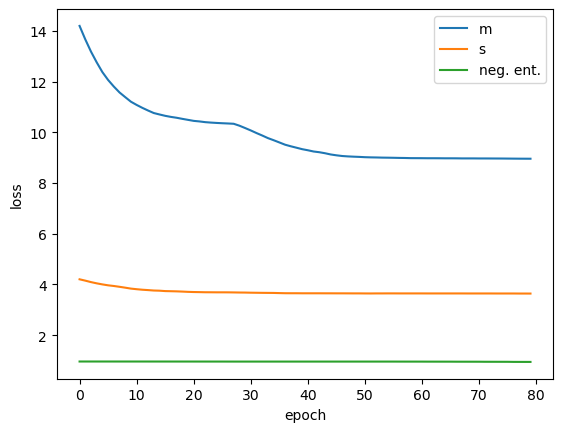

10 unique trees were not found (1 was found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

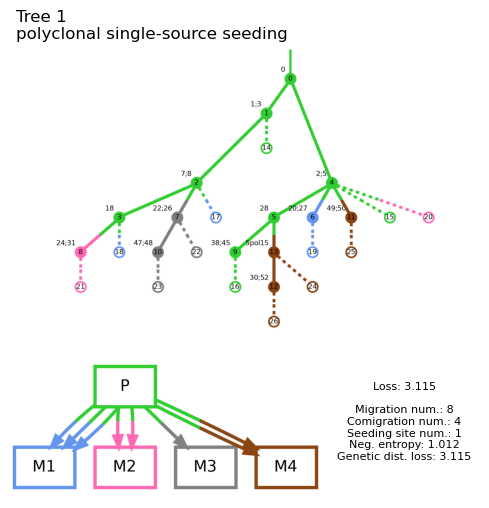

Tree 5
G tensor([[0.0000, 0.0500, 0.0000, 0.0000, 0.2750, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.1500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0250, 0.0000, 0.0000, 0.0000, 0.0750, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1250,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0250, 0.0750, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0500, 0.0000, 0.0000, 0.0500],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0500, 0.0000, 0.0000],
       

100%|██████████| 80/80 [00:03<00:00, 22.13it/s]


num solutions 1024
best_sum 14
best_pars_metrics {(7, 5, 2)}
bs 1024
pruned solutions 9


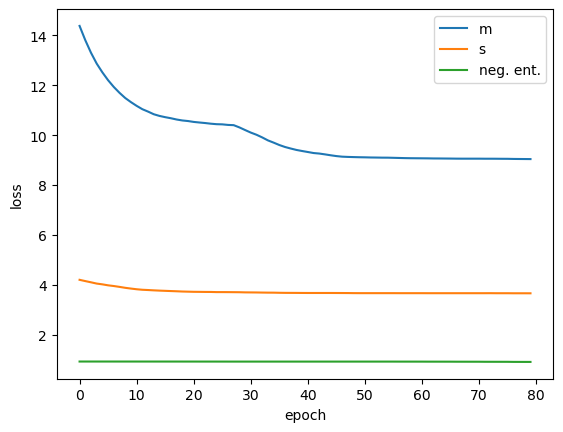

10 unique trees were not found (3 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

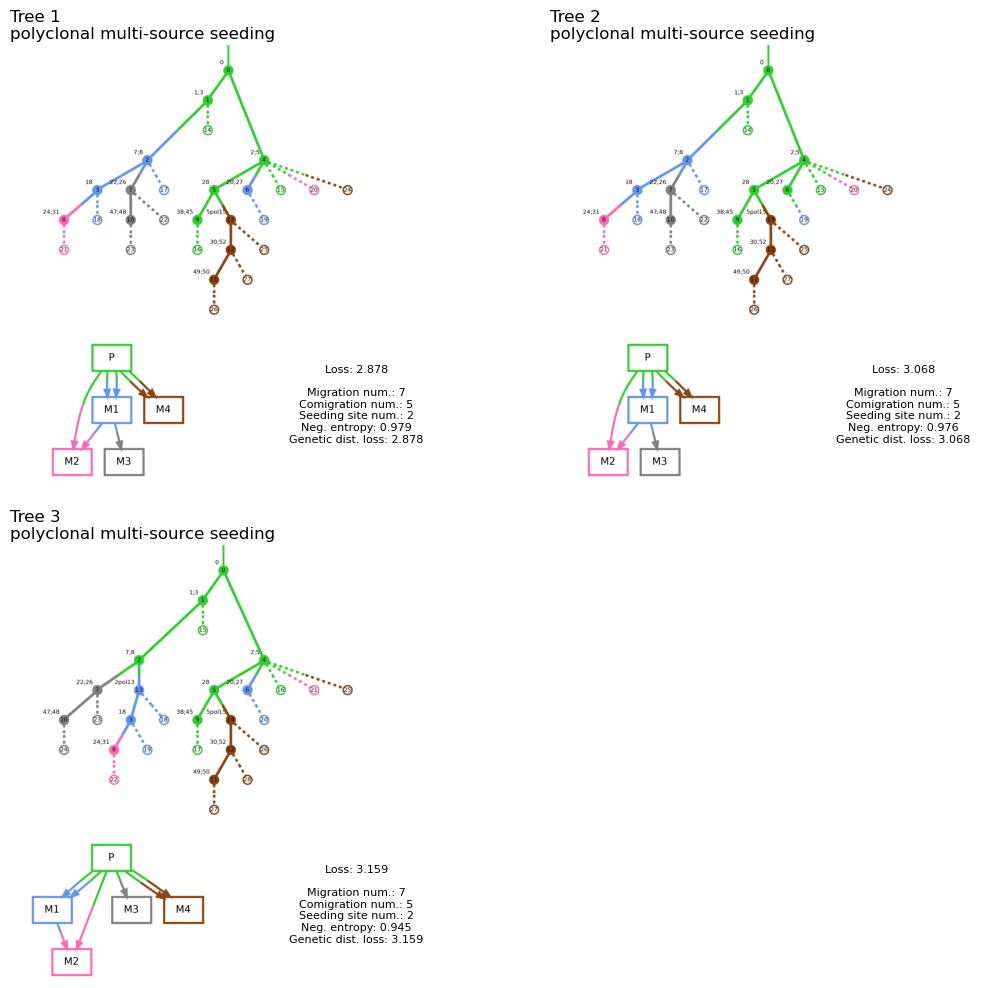

Tree 6
G tensor([[0.0000, 0.0500, 0.0000, 0.0000, 0.2750, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.1500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0250, 0.0000, 0.0000, 0.0750, 0.0750, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0250, 0.0000, 0.0000, 0.1250,
         0.0000, 0.0000, 0.0500, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0500, 0.0000, 0.0000, 0.0500],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0500, 0.0000, 0.0000],
       

100%|██████████| 80/80 [00:06<00:00, 13.08it/s]


num solutions 1024
best_sum 15
best_pars_metrics {(8, 5, 2)}
bs 1024
pruned solutions 10


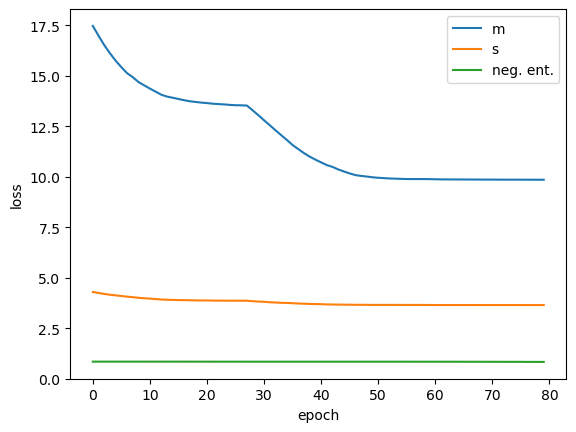

10 unique trees were not found (4 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

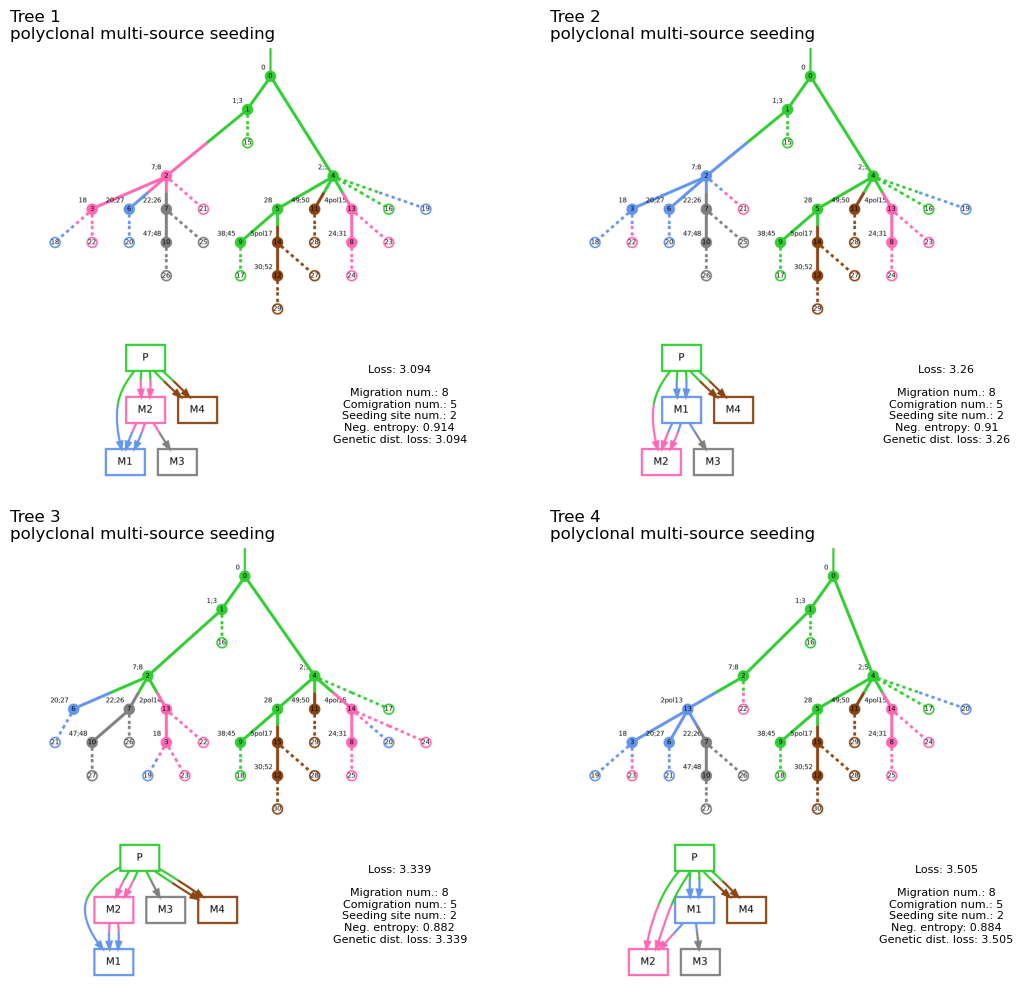

Tree 7
G tensor([[0.0000, 0.0500, 0.0000, 0.0000, 0.2750, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.1500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0250, 0.0000, 0.0000, 0.0750, 0.0750, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0250, 0.0000, 0.0000, 0.1250,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0500, 0.0000, 0.0500, 0.0500],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0500, 0.0000, 0.0000],
       

100%|██████████| 80/80 [00:08<00:00,  9.43it/s]


num solutions 1024
best_sum 14
best_pars_metrics {(8, 4, 2)}
bs 1024
pruned solutions 1


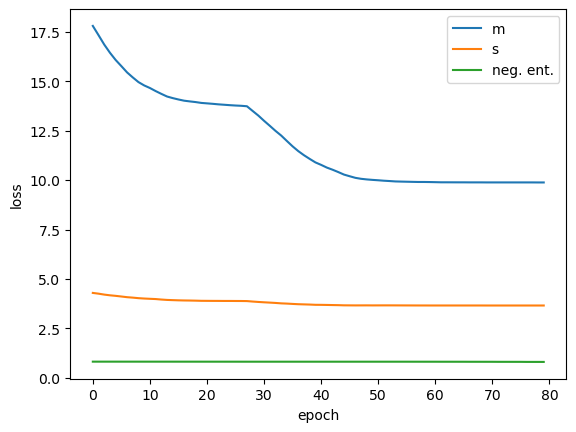

10 unique trees were not found (1 was found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

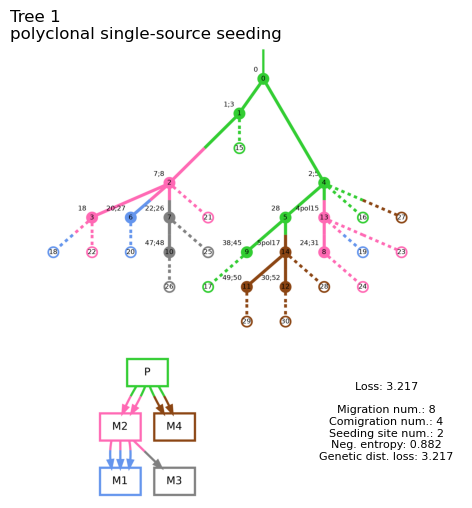

Tree 8
G tensor([[0.0000, 0.0500, 0.0000, 0.0000, 0.2750, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.1500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0250, 0.0000, 0.0000, 0.0750, 0.0750, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0250, 0.0000, 0.0000, 0.1250,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0500, 0.0000, 0.0000, 0.0500],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0500, 0.0000, 0.0000],
       

100%|██████████| 80/80 [00:06<00:00, 12.00it/s]


num solutions 1024
best_sum 14
best_pars_metrics {(8, 4, 2)}
bs 1024
pruned solutions 3


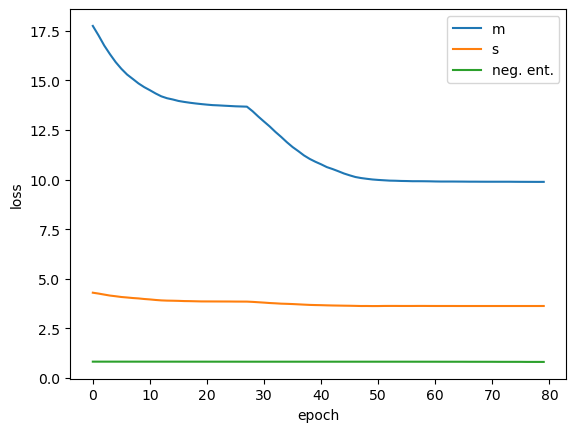

10 unique trees were not found (1 was found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

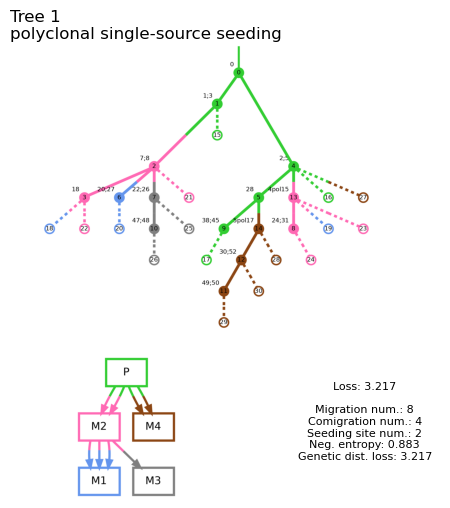

Tree 9
G tensor([[0.0000, 0.0500, 0.0000, 0.0000, 0.2750, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.1500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0250, 0.0000, 0.0000, 0.0000, 0.0750, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0250, 0.0750, 0.0000, 0.1250,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0500, 0.0000, 0.0500, 0.0500],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0500, 0.0000, 0.0000],
       

100%|██████████| 80/80 [00:06<00:00, 12.36it/s]


num solutions 1024
best_sum 13
best_pars_metrics {(7, 4, 2)}
bs 1024
pruned solutions 5


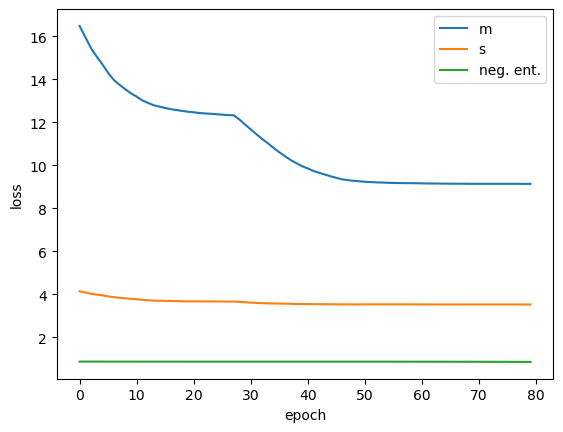

10 unique trees were not found (1 was found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

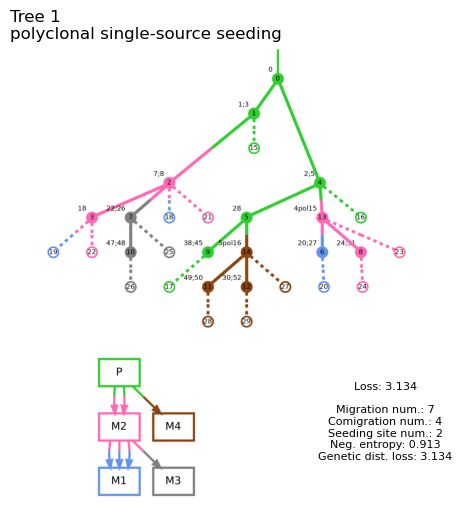

Tree 10
G tensor([[0.0000, 0.0500, 0.0000, 0.0000, 0.2750, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.1500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0250, 0.0000, 0.0000, 0.0000, 0.0750, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0250, 0.0750, 0.0000, 0.1250,
         0.0000, 0.0000, 0.0500, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0500, 0.0000, 0.0000, 0.0500],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0500, 0.0000, 0.0000],
      

100%|██████████| 80/80 [00:07<00:00, 10.61it/s]


num solutions 1024
best_sum 14
best_pars_metrics {(8, 4, 2)}
bs 1024
pruned solutions 2


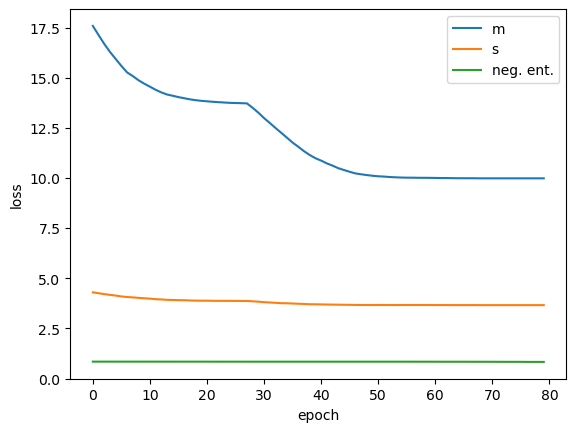

10 unique trees were not found (1 was found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

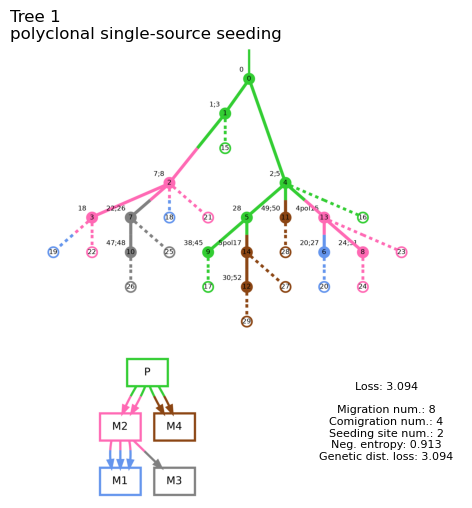

Tree 11
G tensor([[0.0000, 0.0500, 0.0000, 0.0000, 0.2750, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.1500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0250, 0.0000, 0.0000, 0.0000, 0.0750, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0250, 0.0750, 0.0000, 0.1250,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0500, 0.0000, 0.0000, 0.0500],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0500, 0.0000, 0.0000],
      

100%|██████████| 80/80 [00:07<00:00, 10.70it/s]


num solutions 1024
best_sum 14
best_pars_metrics {(8, 4, 2)}
bs 1024
pruned solutions 1


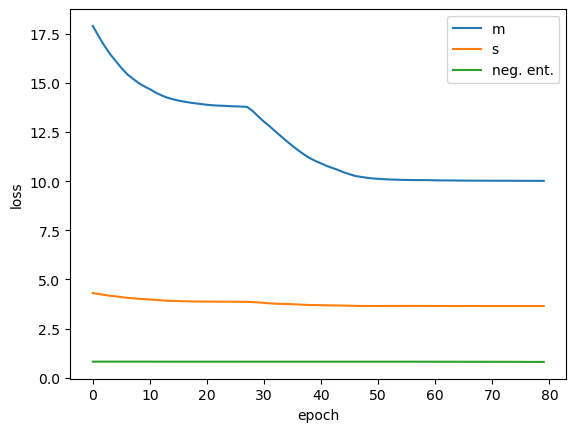

10 unique trees were not found (1 was found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

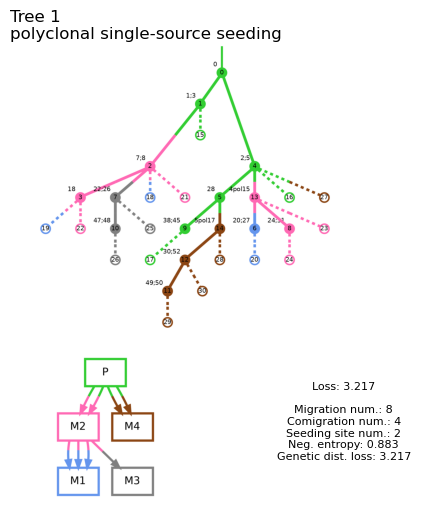

Tree 12
G tensor([[0.0000, 0.0500, 0.0000, 0.0000, 0.2750, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.1500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0750, 0.1250,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0250, 0.0000, 0.0250, 0.0750, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0500, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0500, 0.0000, 0.0000, 0.0500],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0500, 0.0000, 0.0000],
      

100%|██████████| 80/80 [00:06<00:00, 11.56it/s]


num solutions 1024
best_sum 15
best_pars_metrics {(8, 5, 2)}
bs 1024
pruned solutions 26


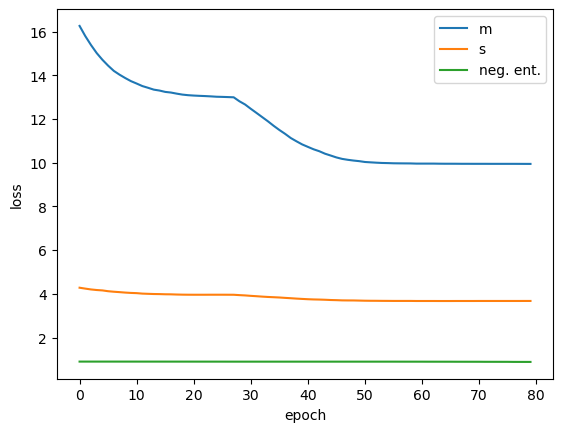

10 unique trees were not found (4 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

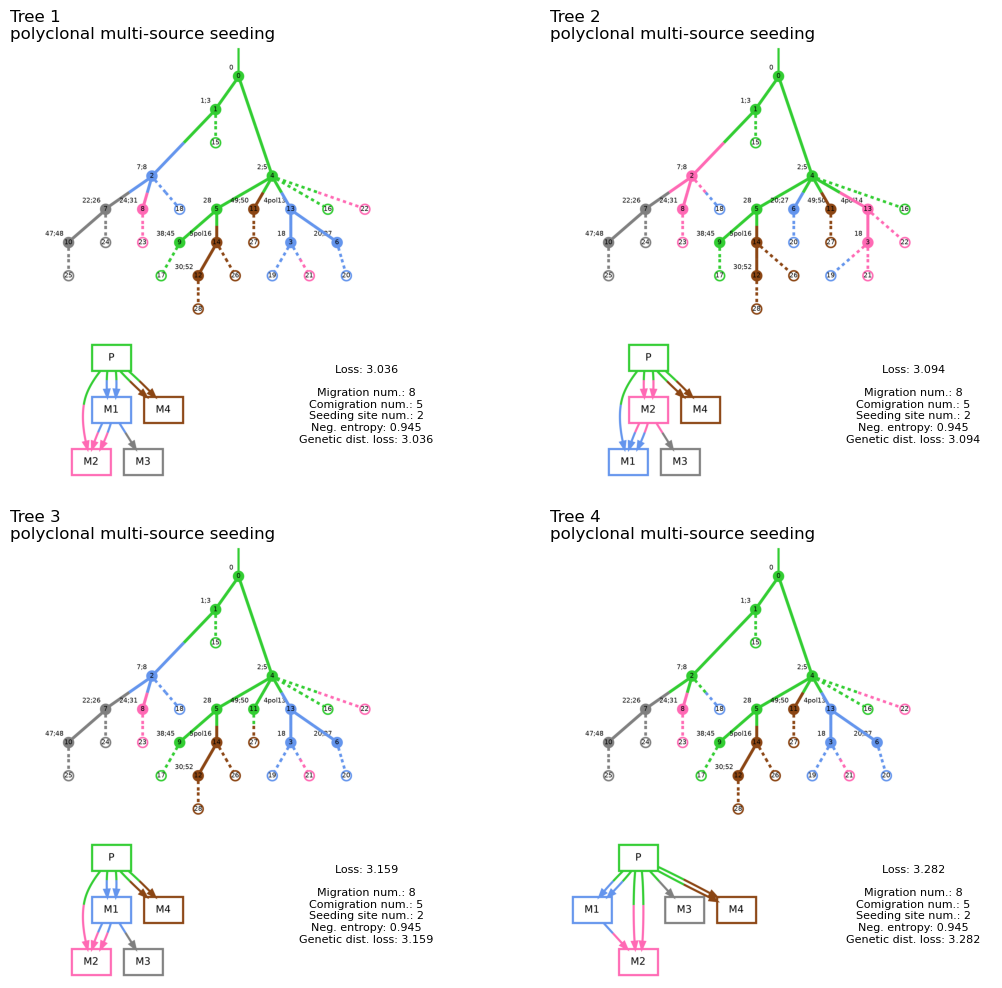

Tree 13
G tensor([[0.0000, 0.0500, 0.0000, 0.0000, 0.2750, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.1500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0750, 0.0750, 0.1250,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0250, 0.0000, 0.0250, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0500, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0500, 0.0000, 0.0000, 0.0500],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0500, 0.0000, 0.0000],
      

  0%|          | 0/80 [00:00<?, ?it/s]

In [ ]:
# %%prun
find_labelings_all_mutation_trees(os.path.join(MACHINA_DATA_DIR, f"{num_sites}_clustered_input", f"cluster_{mig_type}_seed{seed}.txt"),
                                  os.path.join(MACHINA_DATA_DIR, f"{num_sites}_mut_trees", f"mut_trees_{mig_type}_seed{seed}.txt"),
                                  os.path.join(MACHINA_DATA_DIR, f"{num_sites}_clustered_input", f"cluster_{mig_type}_seed{seed}.tsv"))